In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pytz

In [35]:
df = pd.read_csv("demand_pwr.csv")
df.head()

,datetime,/FS5/7200/SDH.DEM.CL43A:DEMAND/681/presentValue,/FS5/7200/SDH.DEM.CR27A:DEMAND/824/presentValue,/FS5/7200/SDH.DEM.CL44A:APPARENT PWR/704/presentValue,/FS5/7200/SDH.DEM.CR26A:DEMAND/789/presentValue,/FS5/7200/SDH.DEM.CL46A:APPARENT PWR/758/presentValue,/FS5/7200/SDH.DEM.ESCD4RA:DEMAND/1243/presentValue,/FS5/7200/SDH.DEM.CR22A:DEMAND/663/presentValue,/FS5/7200/SDH.DEM.CL42A:APPARENT PWR/650/presentValue,/FS5/7200/SDH.DEM.ESCD4RA:APPARENT PWR/1248/presentValue,...,/FS5/7200/SDH.DEM.CL42A:DEMAND/645/presentValue,/FS5/7200/SDH.DEM.EOMD42A:APPARENT PWR/1227/presentValue,/FS5/7200/SDH.DEM.CL44A:DEMAND/699/presentValue,/FS5/7200/SDH.DEM.CR25A:DEMAND/735/presentValue,/FS5/7200/SDH.DEM.CR23A:APPARENT PWR/631/presentValue,/FS5/7200/SDH.DEM.CR26A:APPARENT PWR/794/presentValue,/FS5/7200/SDH.DEM.CR21A:DEMAND/1260/presentValue,/FS5/7200/SDH.DEM.CL45A:APPARENT PWR/776/presentValue,/FS5/7200/SDH.DEM.CR23A:DEMAND/626/presentValue,/FS5/7200/SDH.DEM.CL41A:APPARENT PWR/1280/presentValue
0,5/16/22 17:30,1.920,0.000,5.696,0.384,3.200,13.568,5.056,2.944,19.455999,...,3.072,160.000000,5.888,3.968,2.048,0.256,13.248000,7.936,1.984,2.560
1,5/16/22 17:45,1.920,0.000,5.696,0.384,3.200,12.928,4.224,2.944,16.384001,...,3.072,161.664002,5.888,5.184,1.792,0.256,13.248000,7.936,1.856,7.552
2,5/16/22 18:00,1.984,0.256,6.016,0.512,3.200,11.776,3.648,3.200,17.280001,...,3.328,158.207993,6.144,3.904,1.088,0.384,14.400001,7.872,1.216,2.304
3,5/16/22 18:15,1.856,0.320,5.824,0.448,3.200,16.768,3.648,2.944,17.407999,...,3.072,160.000000,5.952,5.568,1.088,0.384,14.400001,7.744,1.152,1.664
4,5/16/22 18:30,1.984,0.192,5.760,0.448,2.944,10.752,4.224,2.944,16.768000,...,3.072,158.591995,5.952,3.968,0.896,0.320,13.248000,7.680,1.088,1.600


In [36]:
print(df.columns)

Index(['datetime', '/FS5/7200/SDH.DEM.CL43A:DEMAND/681/presentValue',
       '/FS5/7200/SDH.DEM.CR27A:DEMAND/824/presentValue',
       '/FS5/7200/SDH.DEM.CL44A:APPARENT PWR/704/presentValue',
       '/FS5/7200/SDH.DEM.CR26A:DEMAND/789/presentValue',
       '/FS5/7200/SDH.DEM.CL46A:APPARENT PWR/758/presentValue',
       '/FS5/7200/SDH.DEM.ESCD4RA:DEMAND/1243/presentValue',
       '/FS5/7200/SDH.DEM.CR22A:DEMAND/663/presentValue',
       '/FS5/7200/SDH.DEM.CL42A:APPARENT PWR/650/presentValue',
       '/FS5/7200/SDH.DEM.ESCD4RA:APPARENT PWR/1248/presentValue',
       '/FS5/7200/SDH.DEM.CL47A:APPARENT PWR/811/presentValue',
       '/FS5/7200/SDH.DEM.CR27A:APPARENT PWR/829/presentValue',
       '/FS5/7200/SDH.DEM.CL41A:DEMAND/1275/presentValue',
       '/FS5/7200/SDH.DEM.CR22A:APPARENT PWR/668/presentValue',
       '/FS5/7200/SDH.DEM.CR24A:APPARENT PWR/722/presentValue',
       '/FS5/7200/SDH.DEM.CL46A:DEMAND/753/presentValue',
       '/FS5/7200/SDH.DEM.EOMD42A:DEMAND/842/presentValue',
   

In [37]:
# Reorganize column name
prefix_to_remove = '/FS5/7200/SDH.DEM.'
suffix_to_remove = '/presentValue'

df.columns = [col.replace(prefix_to_remove, '') if col.startswith(prefix_to_remove) else col for col in df.columns]
df.columns = [col.replace(suffix_to_remove, '') if col.endswith(suffix_to_remove) else col for col in df.columns]
df.columns = [col.split('/')[0] for col in df.columns]

df.head()

,datetime,CL43A:DEMAND,CR27A:DEMAND,CL44A:APPARENT PWR,CR26A:DEMAND,CL46A:APPARENT PWR,ESCD4RA:DEMAND,CR22A:DEMAND,CL42A:APPARENT PWR,ESCD4RA:APPARENT PWR,...,CL42A:DEMAND,EOMD42A:APPARENT PWR,CL44A:DEMAND,CR25A:DEMAND,CR23A:APPARENT PWR,CR26A:APPARENT PWR,CR21A:DEMAND,CL45A:APPARENT PWR,CR23A:DEMAND,CL41A:APPARENT PWR
0,5/16/22 17:30,1.920,0.000,5.696,0.384,3.200,13.568,5.056,2.944,19.455999,...,3.072,160.000000,5.888,3.968,2.048,0.256,13.248000,7.936,1.984,2.560
1,5/16/22 17:45,1.920,0.000,5.696,0.384,3.200,12.928,4.224,2.944,16.384001,...,3.072,161.664002,5.888,5.184,1.792,0.256,13.248000,7.936,1.856,7.552
2,5/16/22 18:00,1.984,0.256,6.016,0.512,3.200,11.776,3.648,3.200,17.280001,...,3.328,158.207993,6.144,3.904,1.088,0.384,14.400001,7.872,1.216,2.304
3,5/16/22 18:15,1.856,0.320,5.824,0.448,3.200,16.768,3.648,2.944,17.407999,...,3.072,160.000000,5.952,5.568,1.088,0.384,14.400001,7.744,1.152,1.664
4,5/16/22 18:30,1.984,0.192,5.760,0.448,2.944,10.752,4.224,2.944,16.768000,...,3.072,158.591995,5.952,3.968,0.896,0.320,13.248000,7.680,1.088,1.600


In [38]:
print(df.columns)

Index(['datetime', 'CL43A:DEMAND', 'CR27A:DEMAND', 'CL44A:APPARENT PWR',
       'CR26A:DEMAND', 'CL46A:APPARENT PWR', 'ESCD4RA:DEMAND', 'CR22A:DEMAND',
       'CL42A:APPARENT PWR', 'ESCD4RA:APPARENT PWR', 'CL47A:APPARENT PWR',
       'CR27A:APPARENT PWR', 'CL41A:DEMAND', 'CR22A:APPARENT PWR',
       'CR24A:APPARENT PWR', 'CL46A:DEMAND', 'EOMD42A:DEMAND',
       'CR25A:APPARENT PWR', 'CL45A:DEMAND', 'CR24A:DEMAND', 'CL47A:DEMAND',
       'CR21A:APPARENT PWR', 'CL42A:DEMAND', 'EOMD42A:APPARENT PWR',
       'CL44A:DEMAND', 'CR25A:DEMAND', 'CR23A:APPARENT PWR',
       'CR26A:APPARENT PWR', 'CR21A:DEMAND', 'CL45A:APPARENT PWR',
       'CR23A:DEMAND', 'CL41A:APPARENT PWR'],
      dtype='object')


In [39]:
# change datetime to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'] = df['datetime'].dt.tz_localize('America/Los_Angeles')

In [40]:
# split into MSA and MSB dataframe
# Define the keywords
keywords = ['DEMAND', 'APPARENT PWR']

# Identify columns containing the keywords
columns_with_keywords = {keyword: [col for col in df.columns if keyword in col] for keyword in keywords}

print("Columns with Keywords:")
print(columns_with_keywords)

# Create sub DataFrames based on identified columns
sub_dataframes = {}
for keyword, cols in columns_with_keywords.items():
    # Include the first column ('ID') and the columns with the keyword
    selected_cols = ['datetime'] + cols
    sub_dataframes[keyword] = df[selected_cols]

df_demand = sub_dataframes['DEMAND']
df_pwr = sub_dataframes['APPARENT PWR']

Columns with Keywords:
{'DEMAND': ['CL43A:DEMAND', 'CR27A:DEMAND', 'CR26A:DEMAND', 'ESCD4RA:DEMAND', 'CR22A:DEMAND', 'CL41A:DEMAND', 'CL46A:DEMAND', 'EOMD42A:DEMAND', 'CL45A:DEMAND', 'CR24A:DEMAND', 'CL47A:DEMAND', 'CL42A:DEMAND', 'CL44A:DEMAND', 'CR25A:DEMAND', 'CR21A:DEMAND', 'CR23A:DEMAND'], 'APPARENT PWR': ['CL44A:APPARENT PWR', 'CL46A:APPARENT PWR', 'CL42A:APPARENT PWR', 'ESCD4RA:APPARENT PWR', 'CL47A:APPARENT PWR', 'CR27A:APPARENT PWR', 'CR22A:APPARENT PWR', 'CR24A:APPARENT PWR', 'CR25A:APPARENT PWR', 'CR21A:APPARENT PWR', 'EOMD42A:APPARENT PWR', 'CR23A:APPARENT PWR', 'CR26A:APPARENT PWR', 'CL45A:APPARENT PWR', 'CL41A:APPARENT PWR']}


In [41]:
# split into peak demand and power dataframe
# Define the keywords
keywords = ['CR', 'CL']

# Identify columns containing the keywords
columns_with_keywords = {keyword: [col for col in df_demand.columns if keyword in col] for keyword in keywords}

print("Columns with Keywords:")
print(columns_with_keywords)

# Create sub DataFrames based on identified columns
sub_dataframes = {}
for keyword, cols in columns_with_keywords.items():
    # Include the first column ('ID') and the columns with the keyword
    selected_cols = ['datetime'] + cols
    sub_dataframes[keyword] = df[selected_cols]

df_demand_cr = sub_dataframes['CR']
df_demand_cl = sub_dataframes['CL']

# split into peak demand and power dataframe
# Define the keywords
keywords = ['CR', 'CL']

# Identify columns containing the keywords
columns_with_keywords = {keyword: [col for col in df_pwr.columns if keyword in col] for keyword in keywords}

print("Columns with Keywords:")
print(columns_with_keywords)

# Create sub DataFrames based on identified columns
sub_dataframes = {}
for keyword, cols in columns_with_keywords.items():
    # Include the first column ('ID') and the columns with the keyword
    selected_cols = ['datetime'] + cols
    sub_dataframes[keyword] = df[selected_cols]

df_pwr_cr = sub_dataframes['CR']
df_pwr_cl = sub_dataframes['CL']

Columns with Keywords:
{'CR': ['CR27A:DEMAND', 'CR26A:DEMAND', 'CR22A:DEMAND', 'CR24A:DEMAND', 'CR25A:DEMAND', 'CR21A:DEMAND', 'CR23A:DEMAND'], 'CL': ['CL43A:DEMAND', 'CL41A:DEMAND', 'CL46A:DEMAND', 'CL45A:DEMAND', 'CL47A:DEMAND', 'CL42A:DEMAND', 'CL44A:DEMAND']}
Columns with Keywords:
{'CR': ['CR27A:APPARENT PWR', 'CR22A:APPARENT PWR', 'CR24A:APPARENT PWR', 'CR25A:APPARENT PWR', 'CR21A:APPARENT PWR', 'CR23A:APPARENT PWR', 'CR26A:APPARENT PWR'], 'CL': ['CL44A:APPARENT PWR', 'CL46A:APPARENT PWR', 'CL42A:APPARENT PWR', 'CL47A:APPARENT PWR', 'CL45A:APPARENT PWR', 'CL41A:APPARENT PWR']}


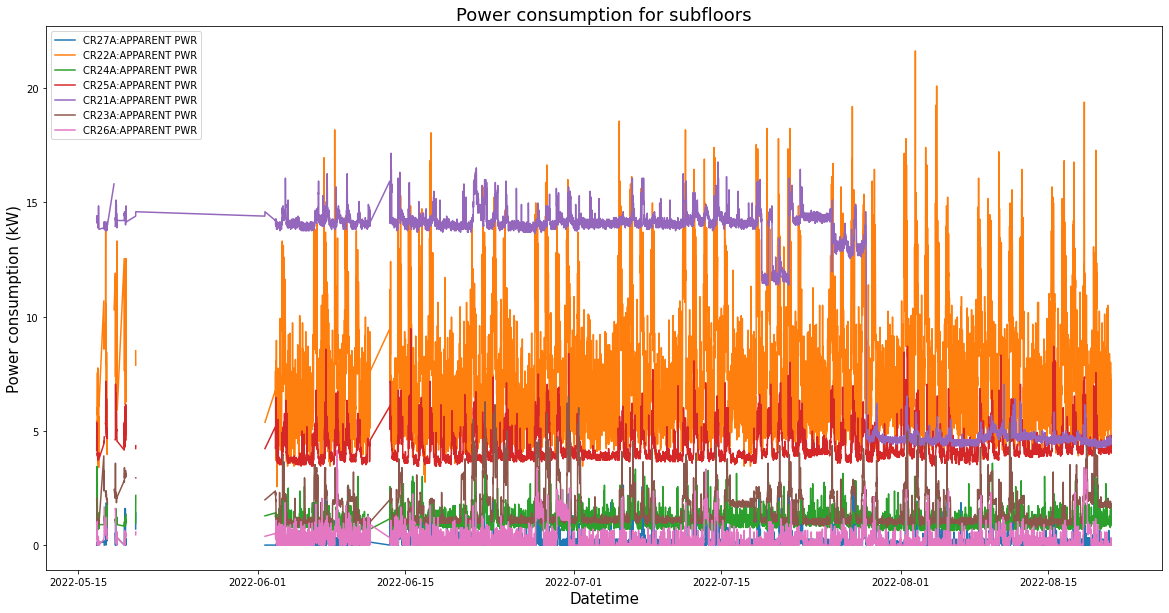

In [42]:
plt.figure(figsize=[20, 10])
for i in df_pwr_cr.columns:
    if "datetime" not in i and "MAIN" not in i:
        plt.plot(df_pwr_cr['datetime'], df_pwr_cr[i], label = i)

plt.xlabel('Datetime', fontsize = 15)
plt.ylabel('Power consumption (kW)', fontsize = 15)
plt.title('Power consumption for subfloors', fontsize = 18)
plt.legend()
plt.show()

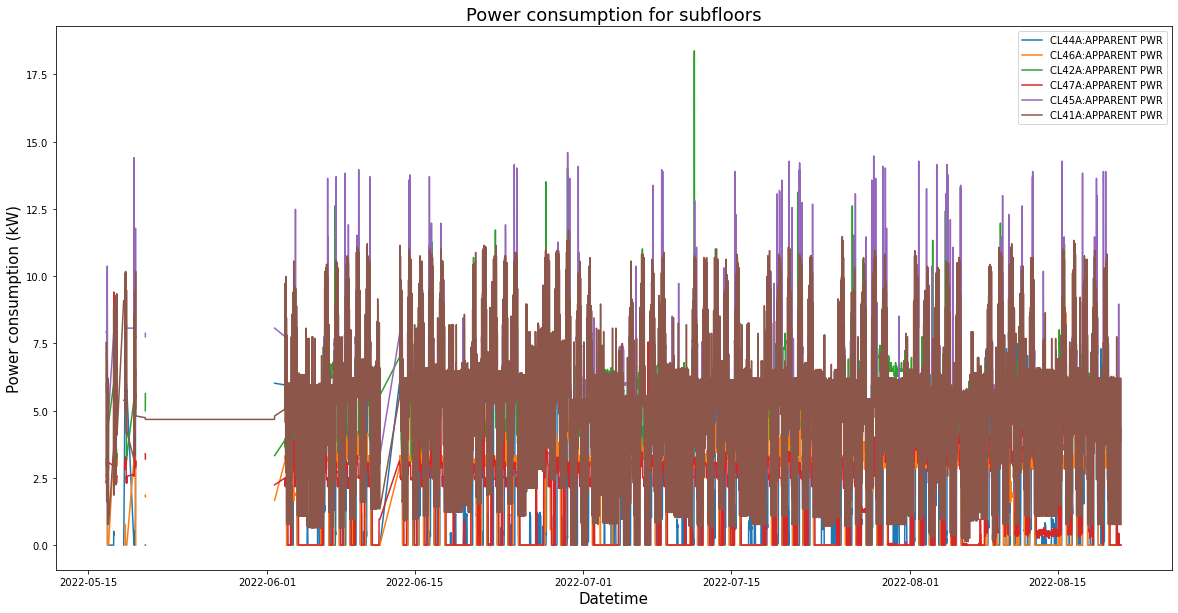

In [43]:
plt.figure(figsize=[20, 10])
for i in df_pwr_cl.columns:
    if "datetime" not in i and "MAIN" not in i:
        plt.plot(df_pwr_cl['datetime'], df_pwr_cl[i], label = i)

plt.xlabel('Datetime', fontsize = 15)
plt.ylabel('Power consumption (kW)', fontsize = 15)
plt.title('Power consumption for subfloors', fontsize = 18)
plt.legend()
plt.show()

### Load MOER data from WattTime API

In [44]:
moer = pd.read_csv("moer.csv")
moer['point_time'] = pd.to_datetime(moer['point_time'])
moer['datetime'] = moer['point_time'].dt.tz_convert('America/Los_Angeles')
moer = moer.drop(columns='point_time')
moer.head()

,value,datetime
0,981.0,2022-05-01 00:00:00-07:00
1,978.0,2022-05-01 00:05:00-07:00
2,978.0,2022-05-01 00:10:00-07:00
3,976.0,2022-05-01 00:15:00-07:00
4,977.0,2022-05-01 00:20:00-07:00


In [45]:
moer['moer'] = moer['value'] * 0.454
moer.set_index('datetime', inplace=True)
moer = moer.resample('15T').mean()
moer = moer.reset_index()

In [46]:
df_pwr_cr_merg = pd.merge(df_pwr_cr, moer, on = 'datetime', how = 'outer')
df_pwr_cr_merg.head()

,datetime,CR27A:APPARENT PWR,CR22A:APPARENT PWR,CR24A:APPARENT PWR,CR25A:APPARENT PWR,CR21A:APPARENT PWR,CR23A:APPARENT PWR,CR26A:APPARENT PWR,value,moer
0,2022-05-16 17:30:00-07:00,0.000,5.440,0.960,4.160,14.208000,2.048,0.256,967.000000,439.018000
1,2022-05-16 17:45:00-07:00,0.000,5.056,0.960,5.376,14.400001,1.792,0.256,967.333333,439.169333
2,2022-05-16 18:00:00-07:00,0.128,4.224,1.024,4.160,14.144000,1.088,0.384,964.333333,437.807333
3,2022-05-16 18:15:00-07:00,0.000,4.224,0.896,4.288,14.400001,1.088,0.384,965.666667,438.412667
4,2022-05-16 18:30:00-07:00,0.000,6.016,0.896,4.096,14.336000,0.896,0.320,965.666667,438.412667


/Users/aoyuzou/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


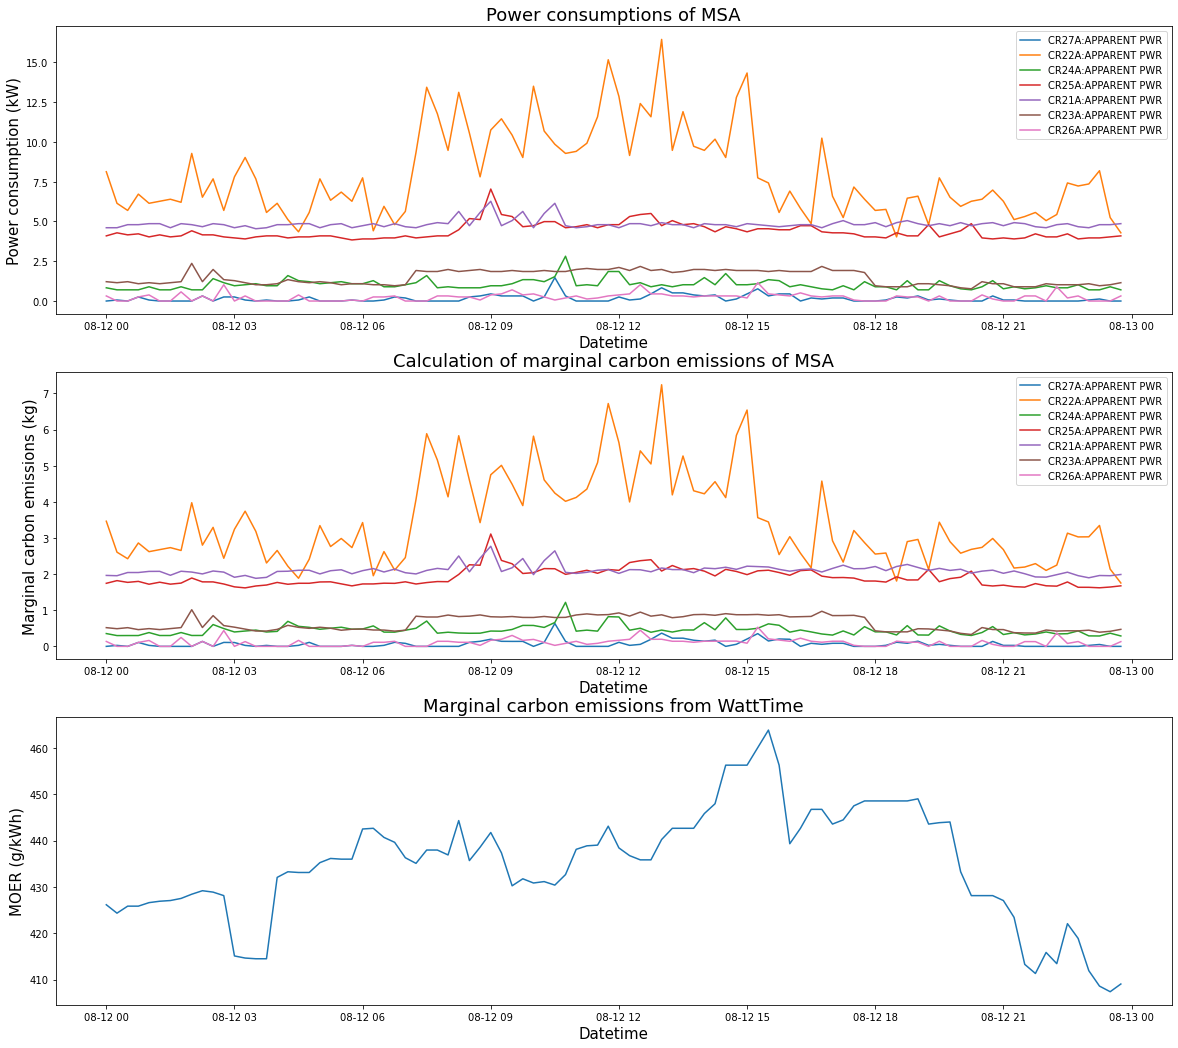

In [53]:
exclude_columns = ['datetime', 'value', 'moer']
df = df_pwr_cr_merg[df_pwr_cr_merg['datetime'].dt.date == pd.to_datetime('2022-08-12')]
plt.figure(figsize=[20, 18])

plt.subplot(3, 1, 1)
for i in df.columns:
    if i not in exclude_columns:
        plt.plot(df['datetime'], df[i], label = i)

plt.xlabel("Datetime", fontsize = 15)
plt.ylabel("Power consumption (kW)", fontsize = 15)
plt.legend()
plt.title("Power consumptions of MSA", fontsize = 18)


plt.subplot(3, 1, 2)
for i in df.columns:
    if i not in exclude_columns:
        plt.plot(df['datetime'], df[i] * df['moer'] / 1000, label = i)

plt.xlabel('Datetime', fontsize = 15)
plt.ylabel('Marginal carbon emissions (kg)', fontsize = 15)
plt.title('Calculation of marginal carbon emissions of MSA', fontsize = 18)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df['datetime'], df['moer'])
plt.xlabel('Datetime', fontsize = 15)
plt.ylabel('MOER (g/kWh)', fontsize = 15)
plt.title('Marginal carbon emissions from WattTime', fontsize = 18)
plt.show()

In [ ]:
df_pwr_cl_merg = pd.merge(df_pwr_cl, moer, on = 'datetime', how = 'outer')
df_pwr_cl_merg.head()

,datetime,CL44A:APPARENT PWR,CL46A:APPARENT PWR,CL42A:APPARENT PWR,CL47A:APPARENT PWR,CL45A:APPARENT PWR,CL41A:APPARENT PWR,value,moer
0,2022-05-16 17:30:00-07:00,5.696,3.200,2.944,2.368,7.936,2.560,967.000000,439.018000
1,2022-05-16 17:45:00-07:00,5.696,3.200,2.944,2.304,7.936,7.552,967.333333,439.169333
2,2022-05-16 18:00:00-07:00,6.016,3.200,3.200,2.624,7.872,2.304,964.333333,437.807333
3,2022-05-16 18:15:00-07:00,5.824,3.200,2.944,2.304,7.744,1.664,965.666667,438.412667
4,2022-05-16 18:30:00-07:00,5.760,2.944,2.944,2.368,7.680,1.600,965.666667,438.412667


/Users/aoyuzou/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


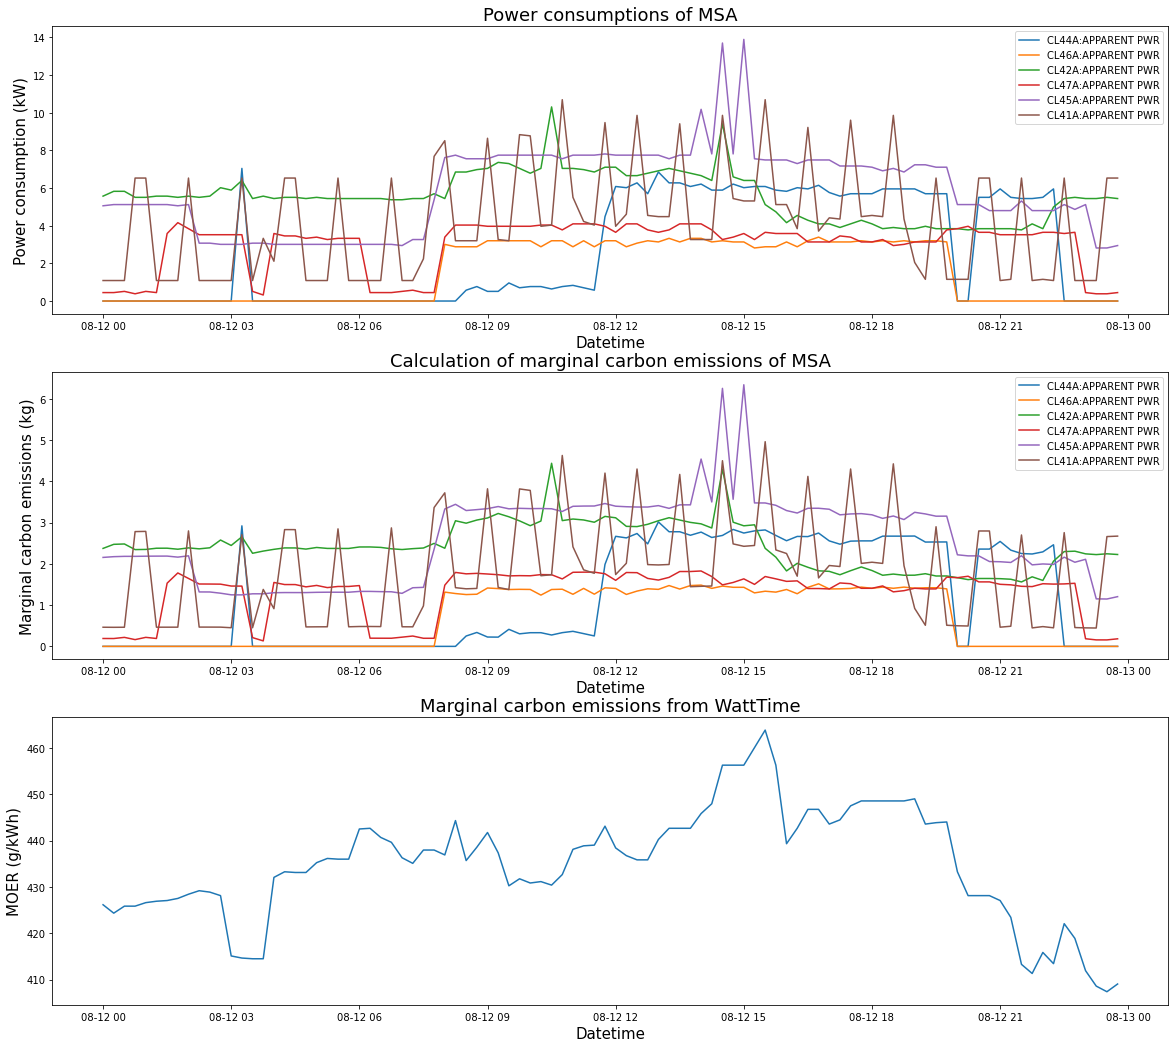

In [52]:
exclude_columns = ['datetime', 'value', 'moer']
df = df_pwr_cl_merg[df_pwr_cl_merg['datetime'].dt.date == pd.to_datetime('2022-08-12')]
plt.figure(figsize=[20, 18])

plt.subplot(3, 1, 1)
for i in df.columns:
    if i not in exclude_columns:
        plt.plot(df['datetime'], df[i], label = i)

plt.xlabel("Datetime", fontsize = 15)
plt.ylabel("Power consumption (kW)", fontsize = 15)
plt.legend()
plt.title("Power consumptions of MSA", fontsize = 18)


plt.subplot(3, 1, 2)
for i in df.columns:
    if i not in exclude_columns:
        plt.plot(df['datetime'], df[i] * df['moer'] / 1000, label = i)

plt.xlabel('Datetime', fontsize = 15)
plt.ylabel('Marginal carbon emissions (kg)', fontsize = 15)
plt.title('Calculation of marginal carbon emissions of MSA', fontsize = 18)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df['datetime'], df['moer'])
plt.xlabel('Datetime', fontsize = 15)
plt.ylabel('MOER (g/kWh)', fontsize = 15)
plt.title('Marginal carbon emissions from WattTime', fontsize = 18)
plt.show()